<a href="https://colab.research.google.com/github/SUSHMA750/DL-COLAB/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - accuracy: 0.8598 - loss: 0.4792 - val_accuracy: 0.9765 - val_loss: 0.0755
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9762 - loss: 0.0792 - val_accuracy: 0.9829 - val_loss: 0.0528
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9846 - loss: 0.0545 - val_accuracy: 0.9850 - val_loss: 0.0427
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9858 - val_loss: 0.0400
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9911 - loss: 0.0297 - val_accuracy: 0.9873 - val_loss: 0.0375
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9868 - val_loss: 0.0380
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9878 - val_loss: 0.0361
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9946 - loss: 0

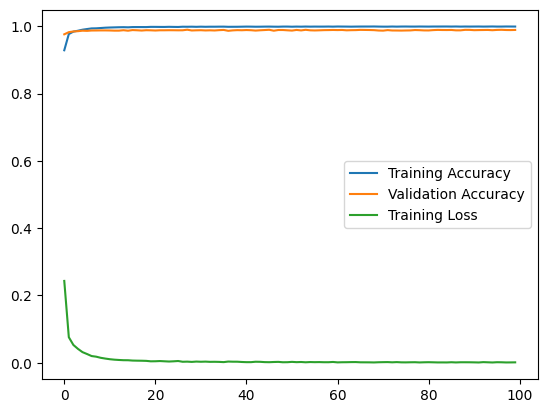

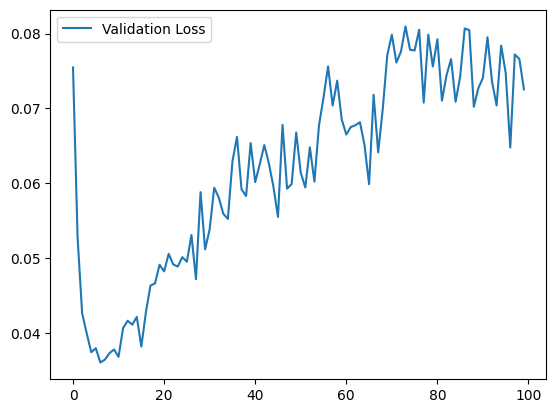

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()